# Selección de características

Para comenzar la selección de características de nuestro conjunto de datos, primero debemos quitar el factor tiempo de las variables.

A continuación, vamos a realizar el análisis de cada una de las variables para comprobar su estacionalidad.

## Revisión de estacionalidad de las variables

Recordemos cuáles son las variables del conjunto de datos:

1. Generación
2. Temperatura
3. Probabilidad de Lluvia
4. Humedad Relativa
5. Velocidad del Viento
6. Dirección del Viento
7. Cobertura de Nubes
8. Índice UV
9. Condición del Cielo (clasificatoria)
10. Dirección del Viento (clasificatoria)
11. Velocidad de Ráfaga
12. Precipitación
13. Temperatura del Punto de Rocío

Para el conjunto de variables, vamos a utilizar las pruebas de **Augmented Dickey-Fuller (ADF)** y de **Kwiatkowski-Phillips-Schmidt-Shin (KPSS)** para revisar la estacionalidad.

También, para mayor apreciación de las gráficas, graficaremos 30 días (720 registros).

In [223]:
#Importaciones
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.decomposition import PCA
import sklearn as sk

In [35]:
#Lectura de datos
datosGeneracion = pd.read_excel("../Datasets/Información Planta Solar Limpio.xlsx")

In [36]:
#Función de test de ADFuller
def adfuller_test(series, alpha):
    result = adfuller(series)
    if result[1] < alpha:
        #Hipótesis alternativa (rechazo H0)
        print('Los datos son estacionarios con un p-value = {:f}'.format(result[1]))
    else:
        #Hipótesis nula (acepto H0)
        print('Los datos NO son estacionarios con p-value = {:f}'.format(result[1]))

In [37]:
#Función de test de KPSS
def kpss_test(series, alpha):
    result = kpss(series)
    if result[1] < alpha:
        #Hipótesis alternativa (rechazo H0)
        print('Los datos NO son estacionarios, tienen una tendencia con un p-value = {:f}'.format(result[1]))
    else:
        #Hipótesis nula (acepto H0)
        print('Los datos son estacionarios con p-value = {:f}'.format(result[1]))

In [53]:
#Función para graficar la descomposición de la estacionalidad
def season_plot(series):
    decomp = sm.tsa.seasonal_decompose(series, period=24)
    decomp_plot = decomp.plot()

    plt.xlabel('Fecha')
    decomp_plot.set_figheight(10)
    decomp_plot.set_figwidth(10)
    plt.show()

In [70]:
#Función para graficar
def line_plotting(title, data, x, y, x_label, y_label, width, height):
    """General function to plot"""
    plt.figure(figsize=(width,height))
    plt.plot(data[x], data[y], color='blue')    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

### Generación

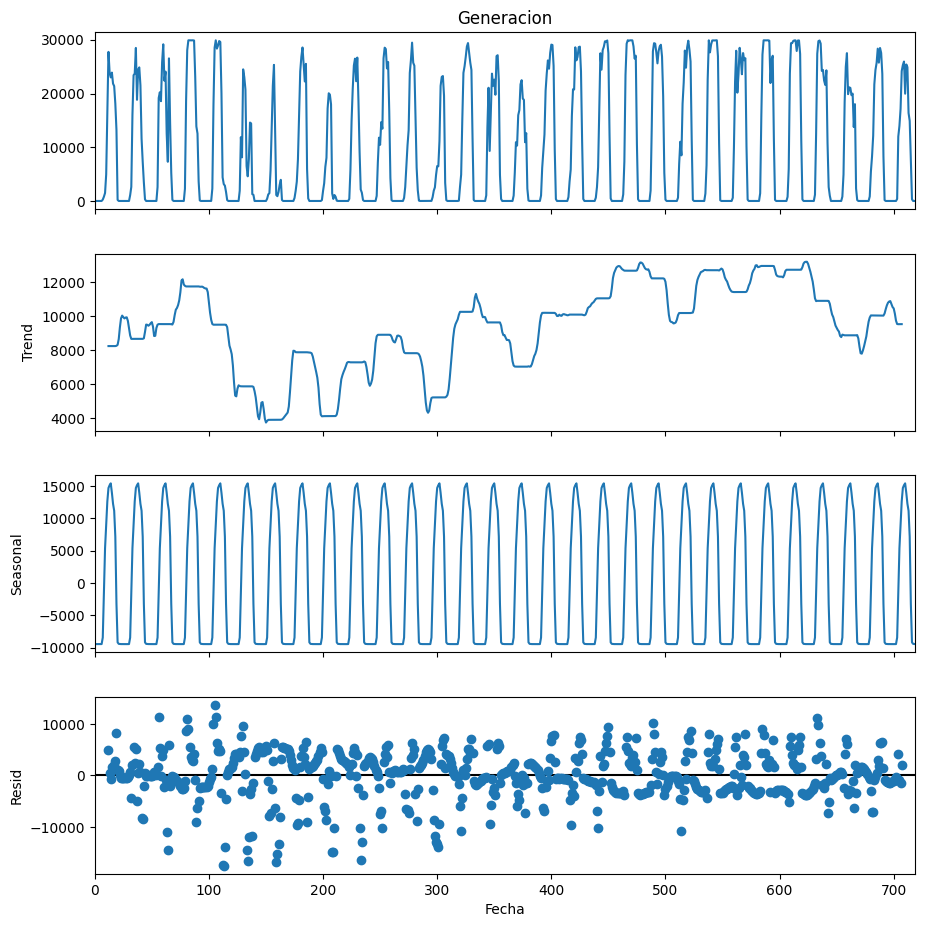

In [62]:
variable = 'Generacion'
datosVariable = datosGeneracion[['Fecha', variable]]

season_plot(datosVariable[variable][:720])

In [64]:
#Hacemos las pruebas
adfuller_test(datosVariable[variable], 0.05)
kpss_test(datosVariable[variable], 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos NO son estacionarios, tienen una tendencia con un p-value = 0.010000


In [65]:
#Ajustamos
datosVariable[variable] = datosVariable[variable].diff(periods=24)

adfuller_test(datosVariable[variable].dropna(), 0.05)
kpss_test(datosVariable[variable].dropna(), 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos son estacionarios con p-value = 0.100000


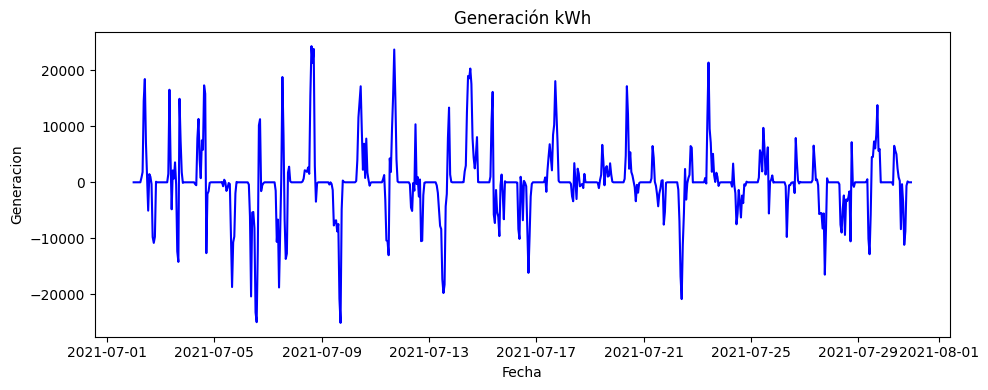

In [75]:
#Graficamos el resultado
line_plotting('Generación kWh', datosVariable[:720], 'Fecha', variable, 'Fecha', variable, 10, 4)

In [66]:
#Guardamos en variable
datosGeneracion['Generacion_diff'] = datosVariable[variable]

### Temperatura

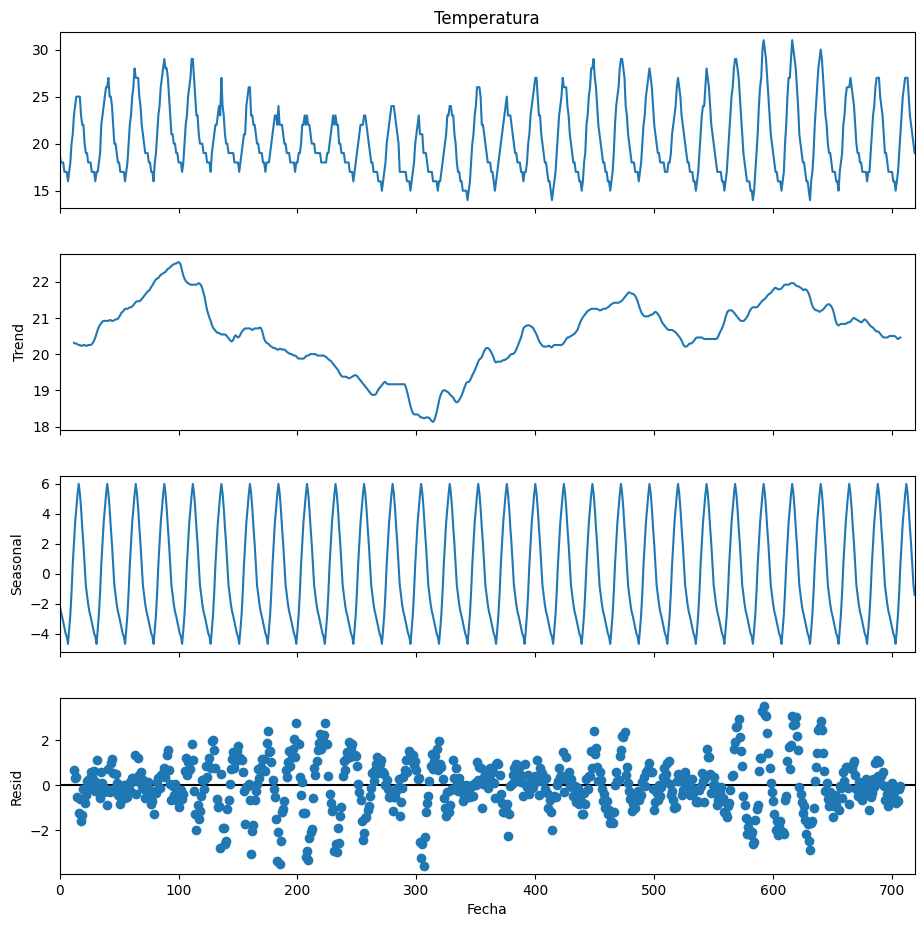

In [76]:
variable = 'Temperatura'
datosVariable = datosGeneracion[['Fecha', variable]]

season_plot(datosVariable[variable][:720])

In [77]:
#Hacemos las pruebas
adfuller_test(datosVariable[variable], 0.05)
kpss_test(datosVariable[variable], 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos NO son estacionarios, tienen una tendencia con un p-value = 0.010000


In [78]:
#Ajustamos
datosVariable[variable] = datosVariable[variable].diff(periods=24)

adfuller_test(datosVariable[variable].dropna(), 0.05)
kpss_test(datosVariable[variable].dropna(), 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos son estacionarios con p-value = 0.100000


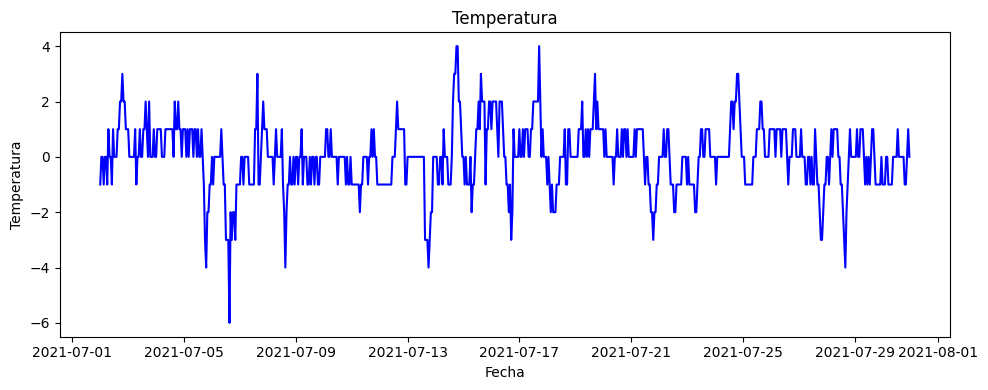

In [79]:
#Graficamos el resultado
line_plotting('Temperatura', datosVariable[:720], 'Fecha', variable, 'Fecha', variable, 10, 4)

In [80]:
#Guardamos en variable
datosGeneracion['Temperatura_diff'] = datosVariable[variable]

### Probabilidad de Lluvia

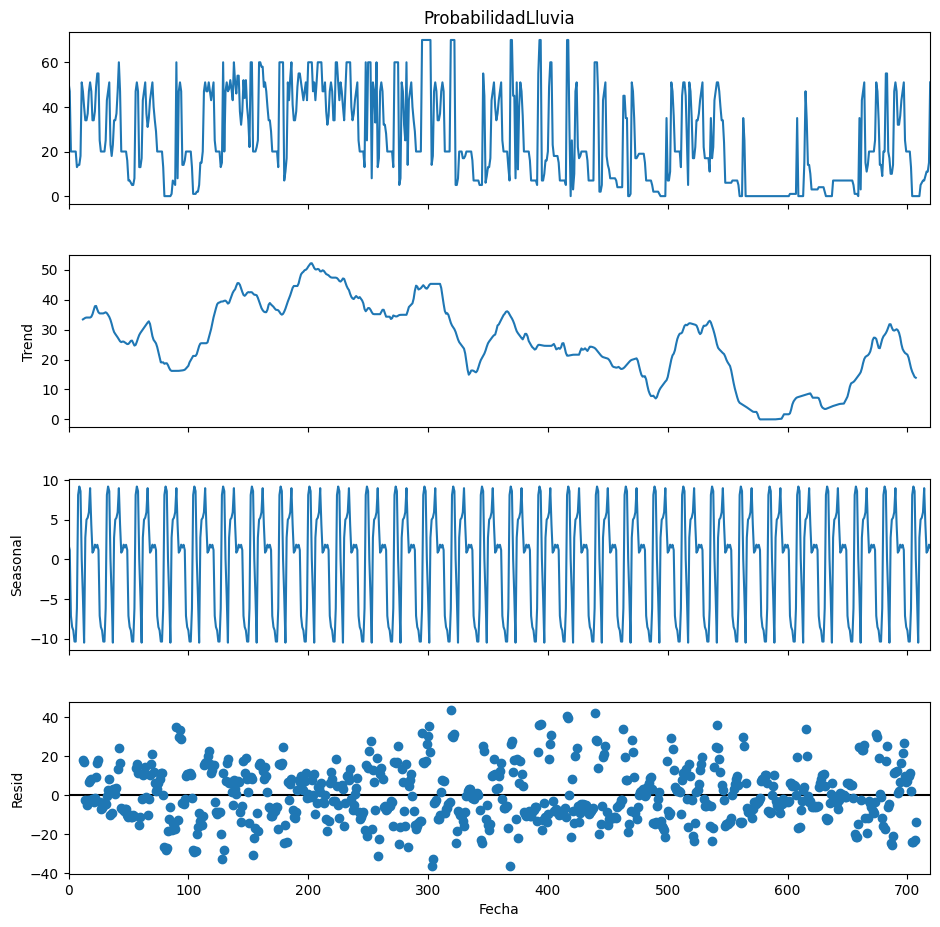

In [81]:
variable = 'ProbabilidadLluvia'
datosVariable = datosGeneracion[['Fecha', variable]]

season_plot(datosVariable[variable][:720])

In [82]:
#Hacemos las pruebas
adfuller_test(datosVariable[variable], 0.05)
kpss_test(datosVariable[variable], 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos NO son estacionarios, tienen una tendencia con un p-value = 0.010000


In [83]:
#Ajustamos
datosVariable[variable] = datosVariable[variable].diff(periods=24)

adfuller_test(datosVariable[variable].dropna(), 0.05)
kpss_test(datosVariable[variable].dropna(), 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos son estacionarios con p-value = 0.100000


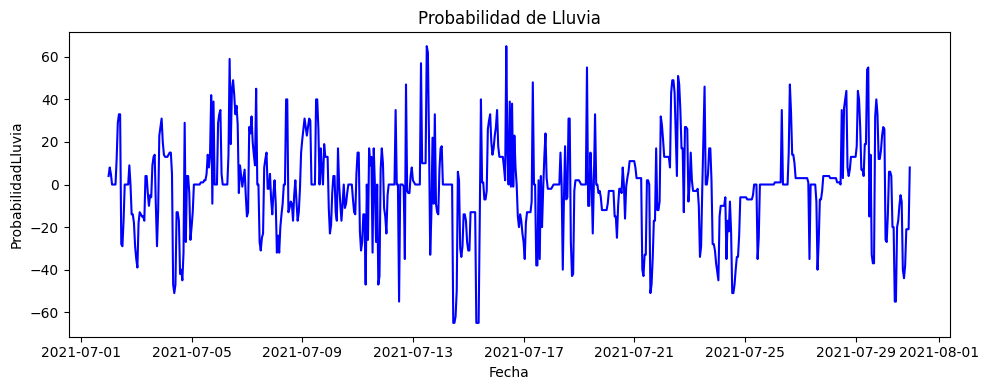

In [84]:
#Graficamos el resultado
line_plotting('Probabilidad de Lluvia', datosVariable[:720], 'Fecha', variable, 'Fecha', variable, 10, 4)

In [85]:
#Guardamos en variable
datosGeneracion['ProbabilidadLluvia_diff'] = datosVariable[variable]

### Humedad Relativa

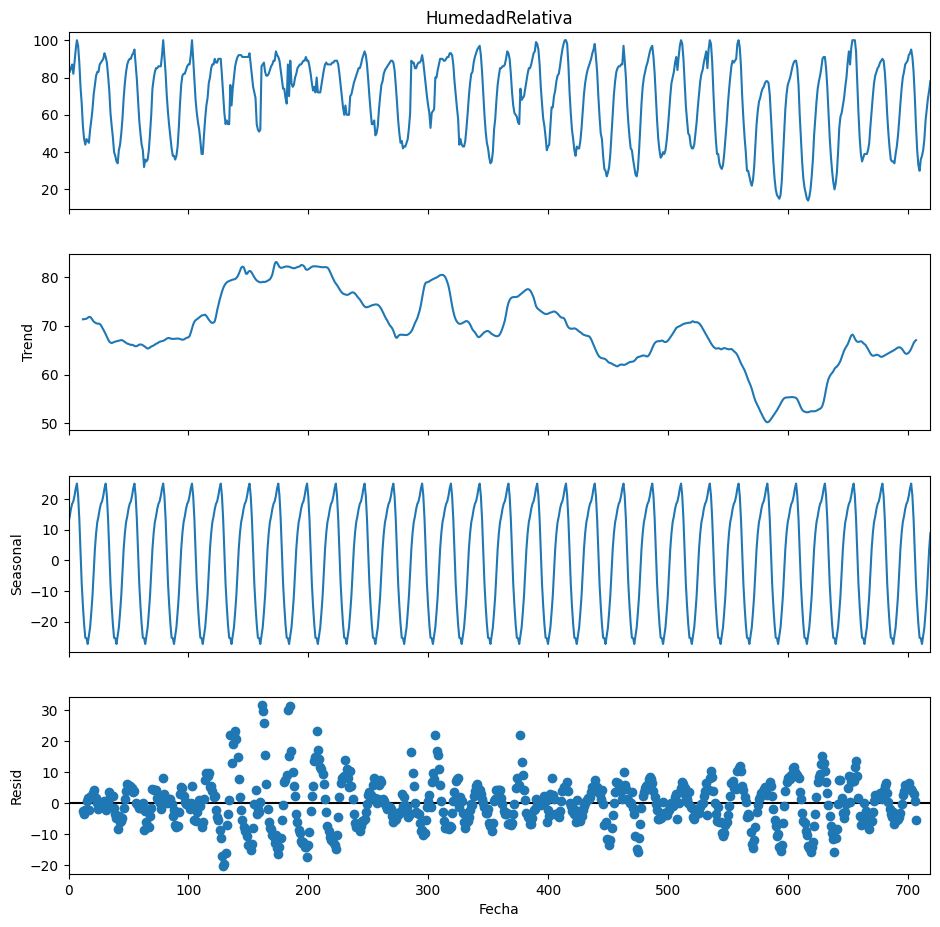

In [86]:
variable = 'HumedadRelativa'
datosVariable = datosGeneracion[['Fecha', variable]]

season_plot(datosVariable[variable][:720])

In [87]:
#Hacemos las pruebas
adfuller_test(datosVariable[variable], 0.05)
kpss_test(datosVariable[variable], 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos NO son estacionarios, tienen una tendencia con un p-value = 0.010000


In [89]:
#Ajustamos
datosVariable[variable] = datosVariable[variable].diff(periods=24)

adfuller_test(datosVariable[variable].dropna(), 0.05)
kpss_test(datosVariable[variable].dropna(), 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos son estacionarios con p-value = 0.100000


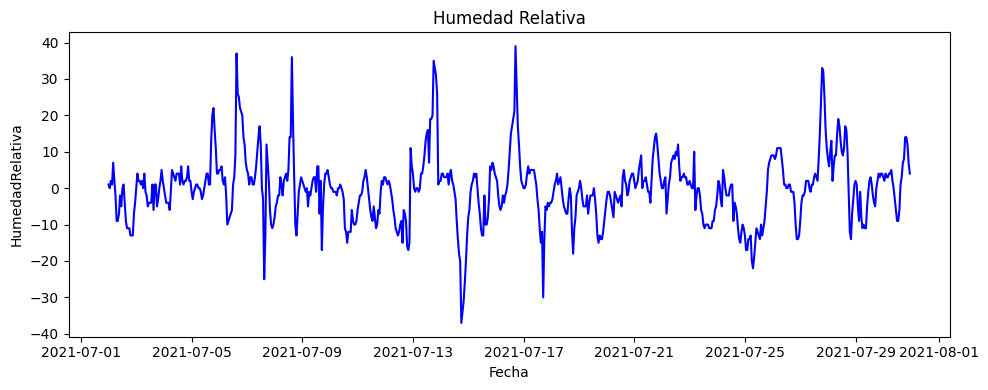

In [90]:
#Graficamos el resultado
line_plotting('Humedad Relativa', datosVariable[:720], 'Fecha', variable, 'Fecha', variable, 10, 4)

In [91]:
#Guardamos en variable
datosGeneracion['HumedadRelativa_diff'] = datosVariable[variable]

### Velocidad del Viento

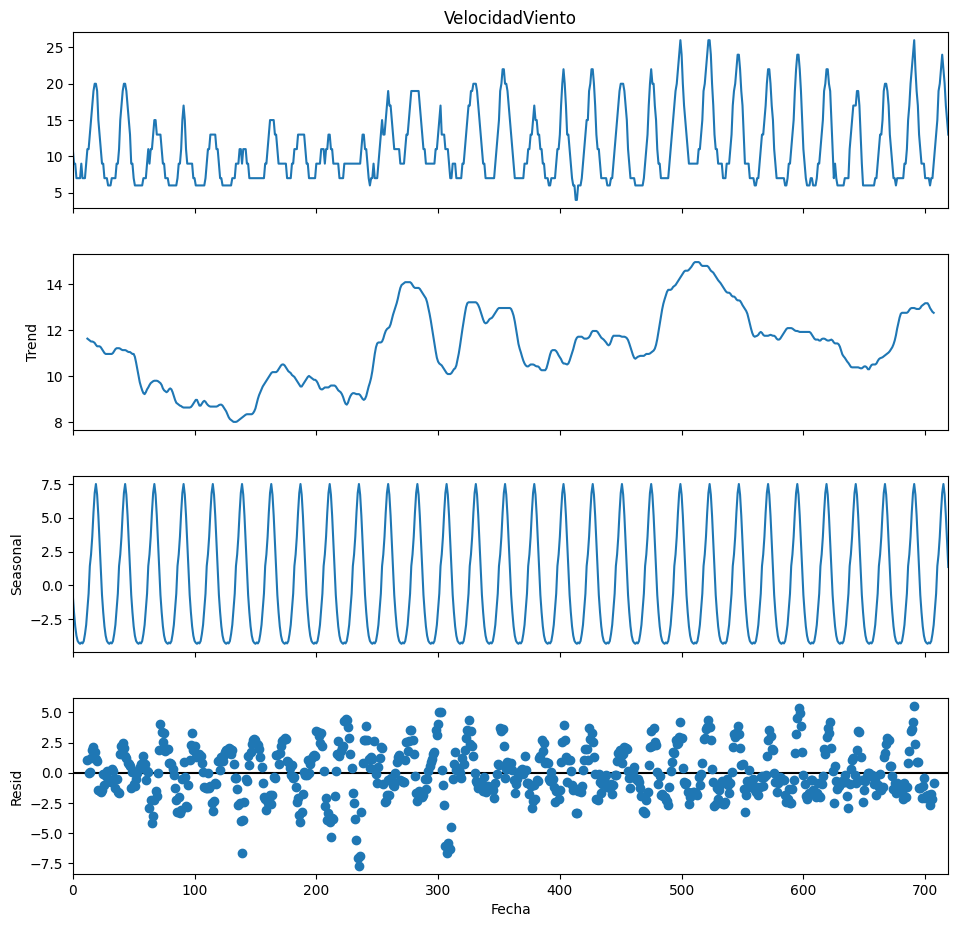

In [92]:
variable = 'VelocidadViento'
datosVariable = datosGeneracion[['Fecha', variable]]

season_plot(datosVariable[variable][:720])

In [93]:
#Hacemos las pruebas
adfuller_test(datosVariable[variable], 0.05)
kpss_test(datosVariable[variable], 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos NO son estacionarios, tienen una tendencia con un p-value = 0.010000


In [94]:
#Ajustamos
datosVariable[variable] = datosVariable[variable].diff(periods=24)

adfuller_test(datosVariable[variable].dropna(), 0.05)
kpss_test(datosVariable[variable].dropna(), 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos son estacionarios con p-value = 0.100000


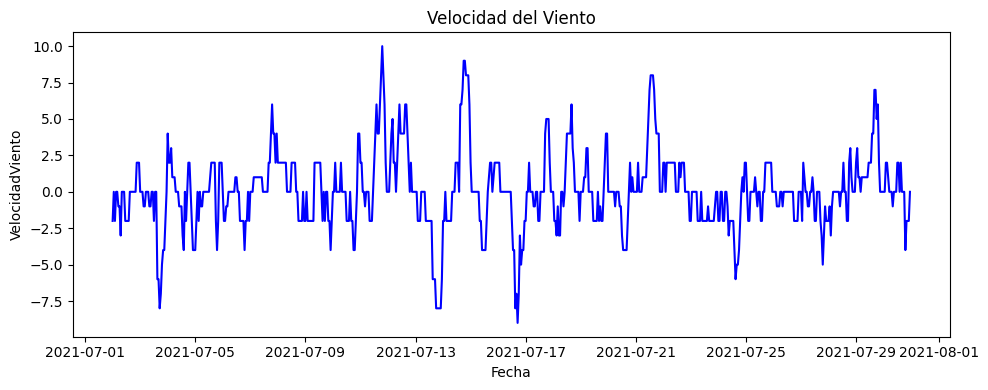

In [95]:
#Graficamos el resultado
line_plotting('Velocidad del Viento', datosVariable[:720], 'Fecha', variable, 'Fecha', variable, 10, 4)

In [96]:
#Guardamos en variable
datosGeneracion['VelocidadViento_diff'] = datosVariable[variable]

### Dirección del Viento en grados

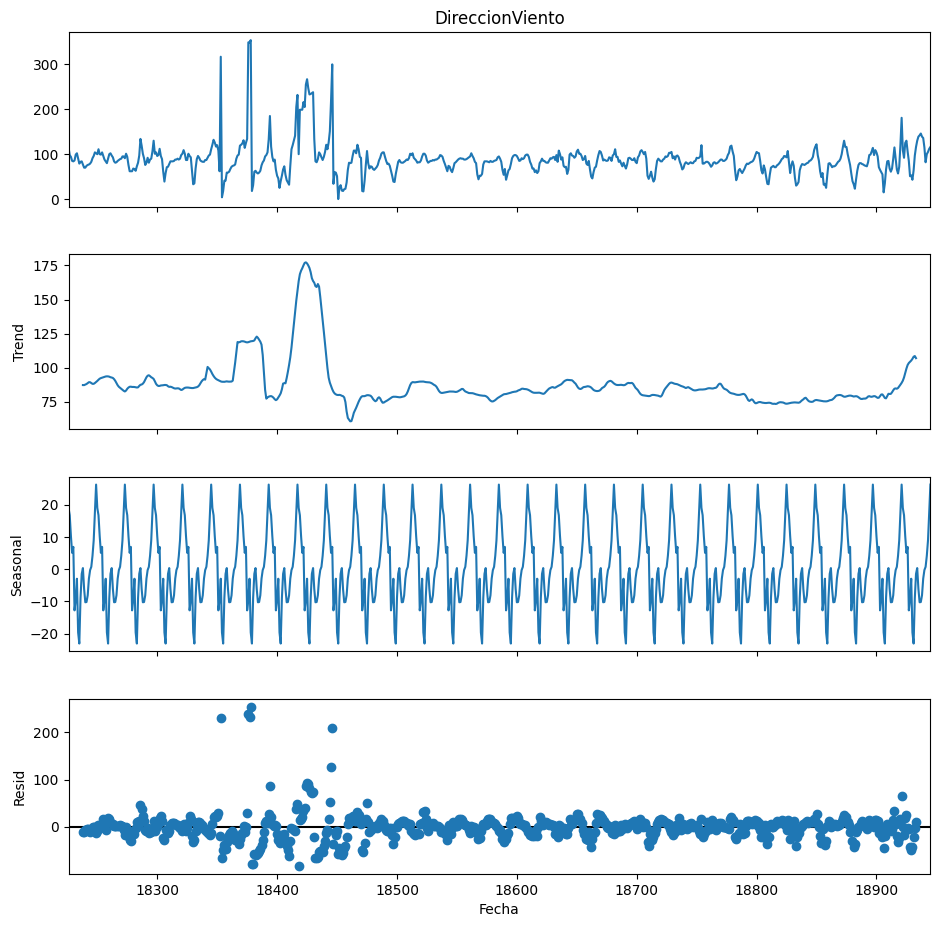

In [101]:
variable = 'DireccionViento'
datosVariable = datosGeneracion[['Fecha', variable]]

season_plot(datosVariable[variable][-720:])

In [102]:
#Hacemos las pruebas
adfuller_test(datosVariable[variable], 0.05)
kpss_test(datosVariable[variable], 0.05)

Los datos son estacionarios con un p-value = 0.000018
Los datos NO son estacionarios, tienen una tendencia con un p-value = 0.010000


In [103]:
#Ajustamos
datosVariable[variable] = datosVariable[variable].diff(periods=24)

adfuller_test(datosVariable[variable].dropna(), 0.05)
kpss_test(datosVariable[variable].dropna(), 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos son estacionarios con p-value = 0.100000


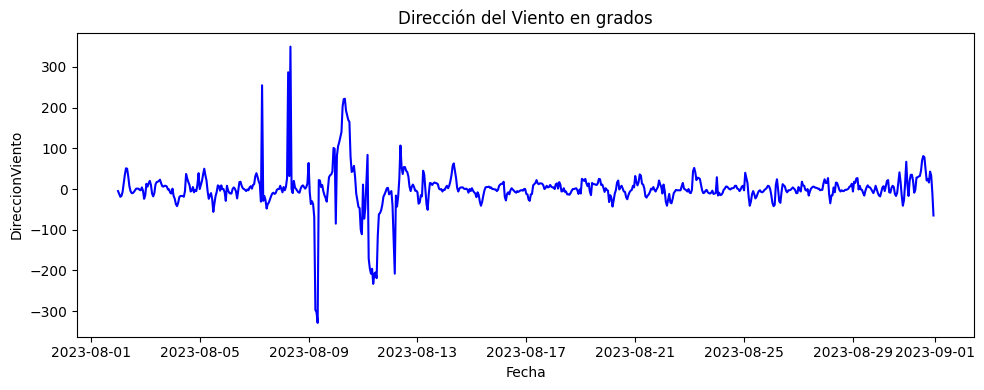

In [105]:
#Graficamos el resultado
line_plotting('Dirección del Viento en grados', datosVariable[-720:], 'Fecha', variable, 'Fecha', variable, 10, 4)

In [106]:
#Guardamos en variable
datosGeneracion['DireccionViento_diff'] = datosVariable[variable]

### Cobertura de Nubes

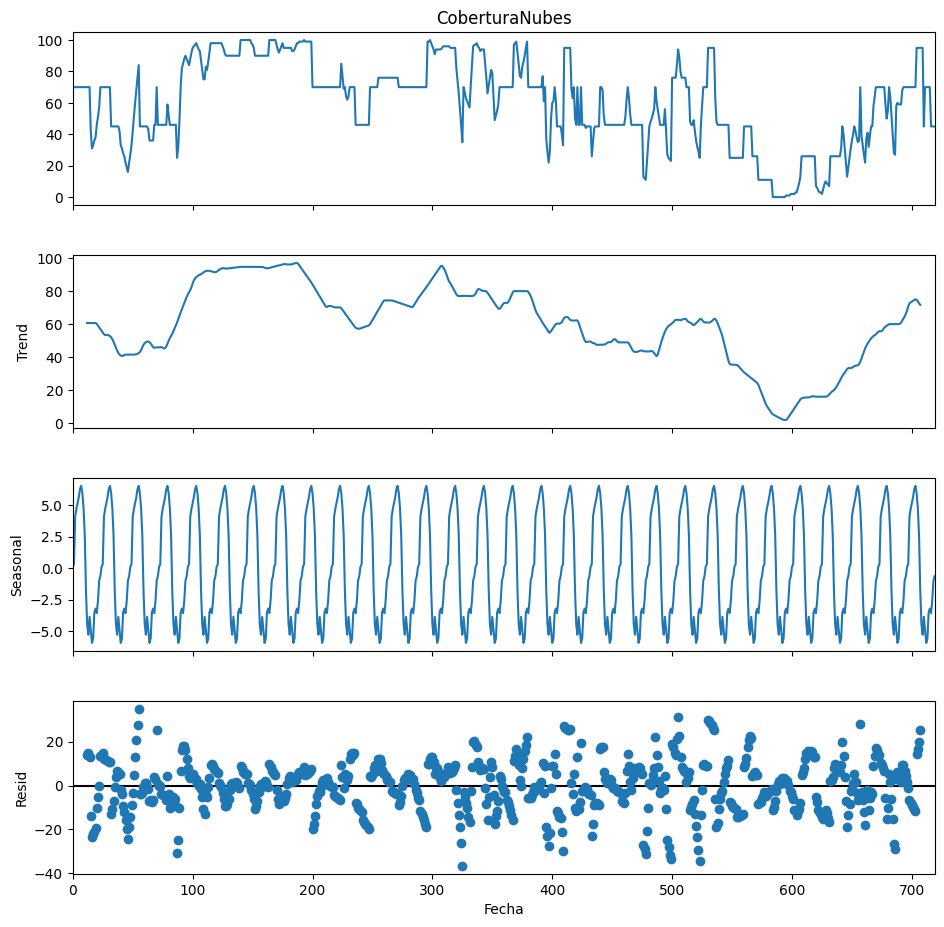

In [110]:
variable = 'CoberturaNubes'
datosVariable = datosGeneracion[['Fecha', variable]]

season_plot(datosVariable[variable][:720])

In [108]:
#Hacemos las pruebas
adfuller_test(datosVariable[variable], 0.05)
kpss_test(datosVariable[variable], 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos son estacionarios con p-value = 0.086891


Para el caso de la cobertura de las nubes, no es necesario realizar un ajuste.

### Índice UV

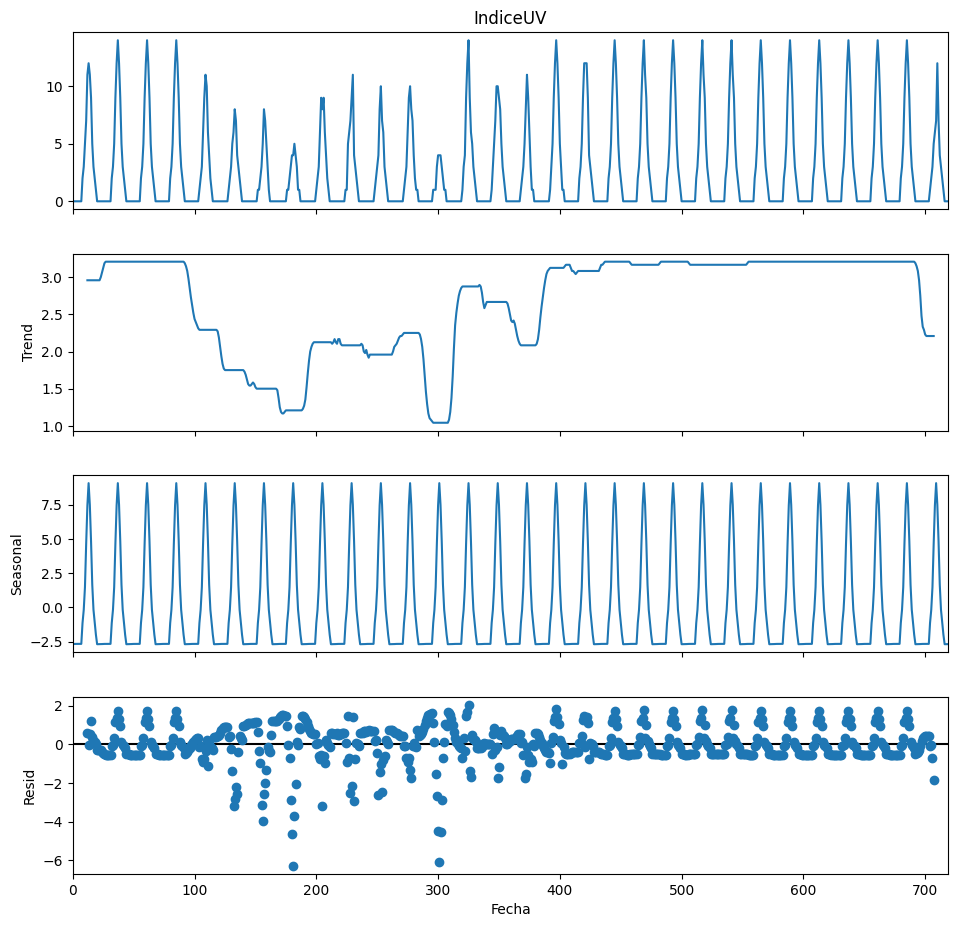

In [116]:
variable = 'IndiceUV'
datosVariable = datosGeneracion[['Fecha', variable]]

season_plot(datosVariable[variable][:720])

In [112]:
#Hacemos las pruebas
adfuller_test(datosVariable[variable], 0.05)
kpss_test(datosVariable[variable], 0.05)

Los datos son estacionarios con un p-value = 0.000001
Los datos NO son estacionarios, tienen una tendencia con un p-value = 0.010000


In [113]:
#Ajustamos
datosVariable[variable] = datosVariable[variable].diff(periods=24)

adfuller_test(datosVariable[variable].dropna(), 0.05)
kpss_test(datosVariable[variable].dropna(), 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos son estacionarios con p-value = 0.100000


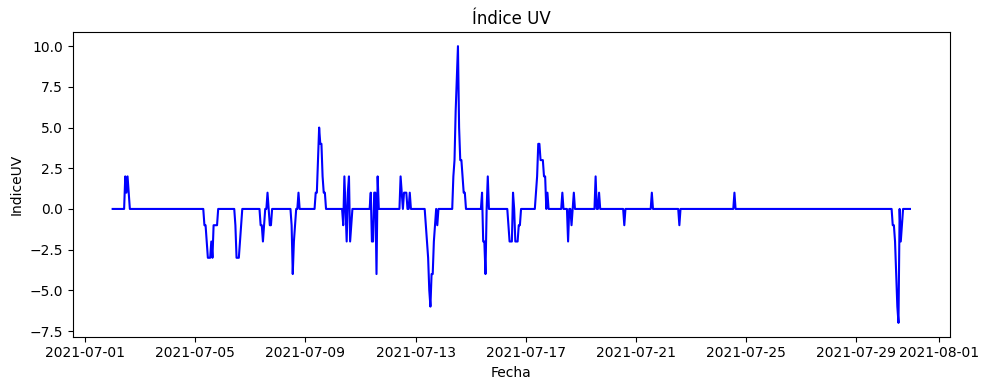

In [114]:
#Graficamos el resultado
line_plotting('Índice UV', datosVariable[:720], 'Fecha', variable, 'Fecha', variable, 10, 4)

In [115]:
#Guardamos en variable
datosGeneracion['IndiceUV_diff'] = datosVariable[variable]

### Velocidad de Ráfaga

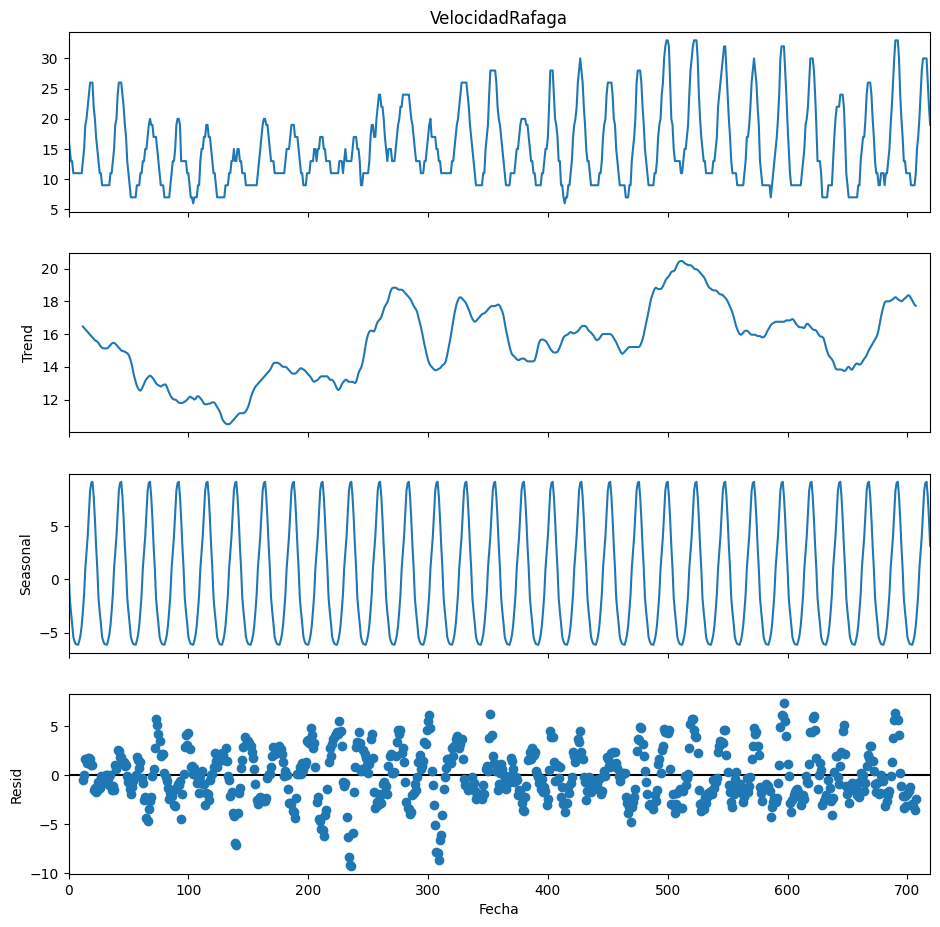

In [117]:
variable = 'VelocidadRafaga'
datosVariable = datosGeneracion[['Fecha', variable]]

season_plot(datosVariable[variable][:720])

In [118]:
#Hacemos las pruebas
adfuller_test(datosVariable[variable], 0.05)
kpss_test(datosVariable[variable], 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos NO son estacionarios, tienen una tendencia con un p-value = 0.010000


In [119]:
#Ajustamos
datosVariable[variable] = datosVariable[variable].diff(periods=24)

adfuller_test(datosVariable[variable].dropna(), 0.05)
kpss_test(datosVariable[variable].dropna(), 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos son estacionarios con p-value = 0.100000


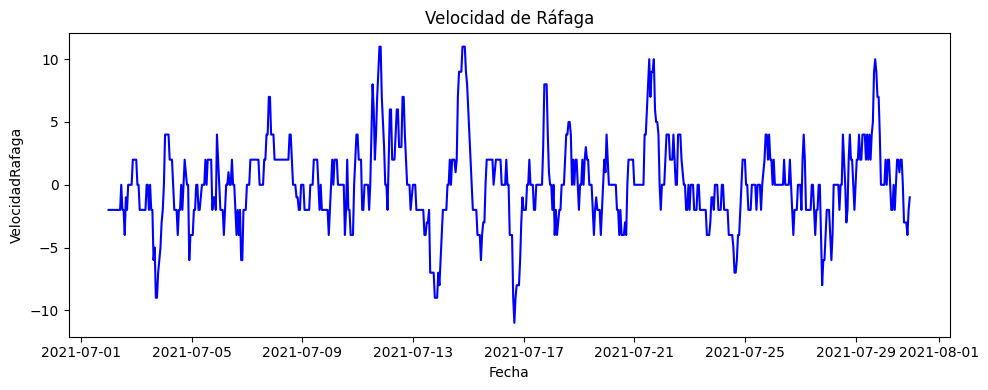

In [120]:
#Graficamos el resultado
line_plotting('Velocidad de Ráfaga', datosVariable[:720], 'Fecha', variable, 'Fecha', variable, 10, 4)

In [121]:
#Guardamos en variable
datosGeneracion['VelocidadRafaga_diff'] = datosVariable[variable]

### Precipitación

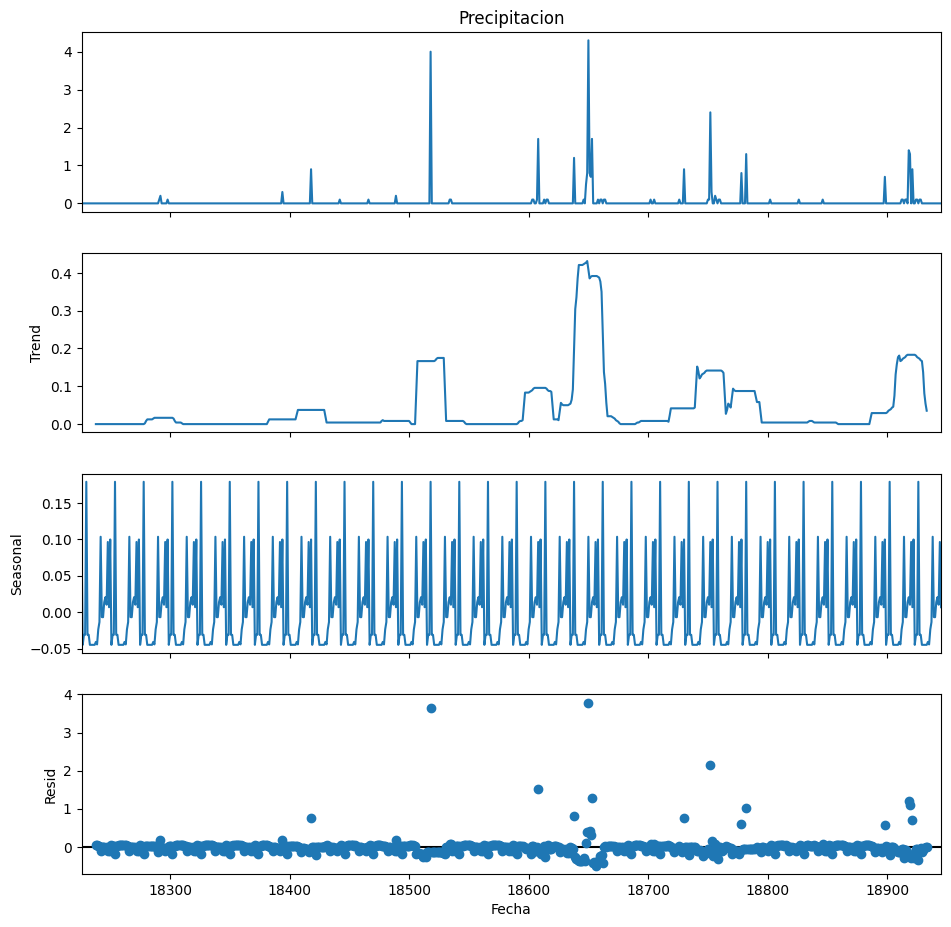

In [123]:
variable = 'Precipitacion'
datosVariable = datosGeneracion[['Fecha', variable]]

season_plot(datosVariable[variable][-720:])

In [124]:
#Hacemos las pruebas
adfuller_test(datosVariable[variable], 0.05)
kpss_test(datosVariable[variable], 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos NO son estacionarios, tienen una tendencia con un p-value = 0.010000


In [125]:
#Ajustamos
datosVariable[variable] = datosVariable[variable].diff(periods=24)

adfuller_test(datosVariable[variable].dropna(), 0.05)
kpss_test(datosVariable[variable].dropna(), 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos son estacionarios con p-value = 0.100000


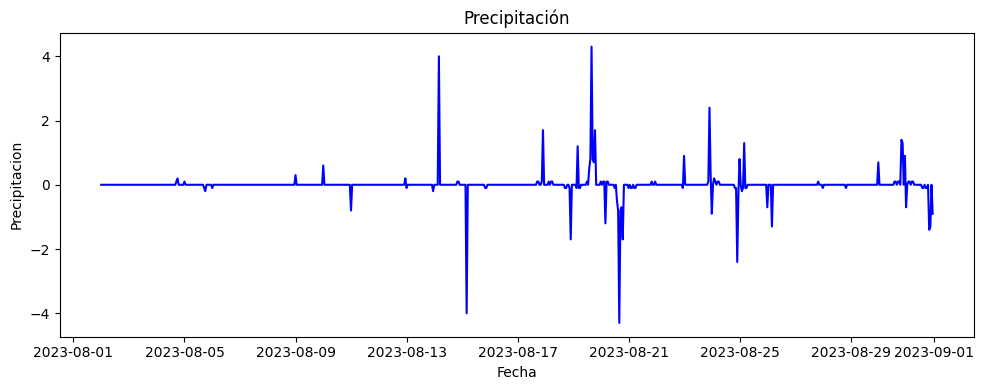

In [127]:
#Graficamos el resultado
line_plotting('Precipitación', datosVariable[-720:], 'Fecha', variable, 'Fecha', variable, 10, 4)

In [128]:
#Guardamos en variable
datosGeneracion['Precipitacion_diff'] = datosVariable[variable]

### DPT

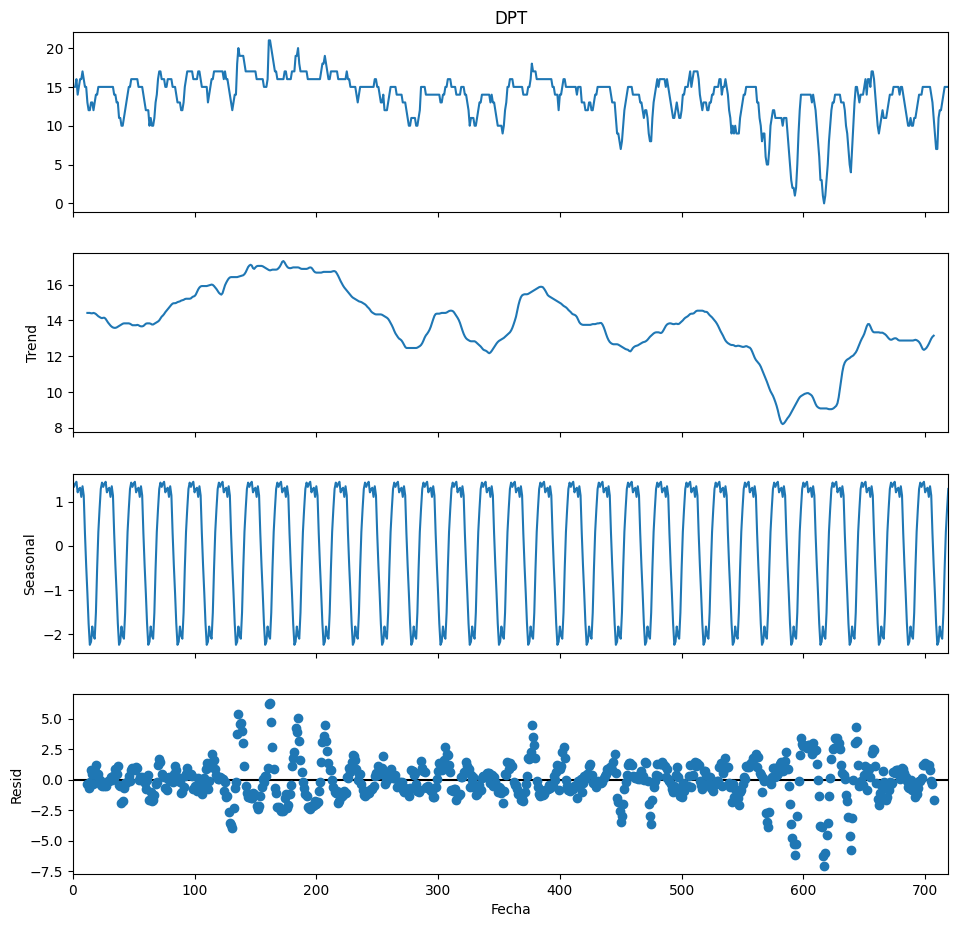

In [129]:
variable = 'DPT'
datosVariable = datosGeneracion[['Fecha', variable]]

season_plot(datosVariable[variable][:720])

In [130]:
#Hacemos las pruebas
adfuller_test(datosVariable[variable], 0.05)
kpss_test(datosVariable[variable], 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos NO son estacionarios, tienen una tendencia con un p-value = 0.010000


In [131]:
#Ajustamos
datosVariable[variable] = datosVariable[variable].diff(periods=24)

adfuller_test(datosVariable[variable].dropna(), 0.05)
kpss_test(datosVariable[variable].dropna(), 0.05)

Los datos son estacionarios con un p-value = 0.000000
Los datos son estacionarios con p-value = 0.100000


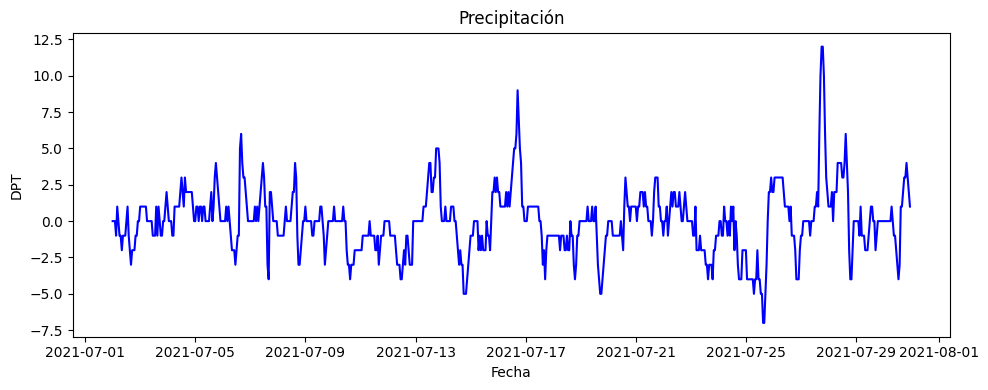

In [132]:
#Graficamos el resultado
line_plotting('Precipitación', datosVariable[:720], 'Fecha', variable, 'Fecha', variable, 10, 4)

In [133]:
#Guardamos en variable
datosGeneracion['DPT_diff'] = datosVariable[variable]

Ya con los datos estacionales, podemos realizar el análisis de los conjuntos. Como trabajaremos con esto en otras tareas, vamos a guardar en un archivo.

In [143]:
#Guardamos en un excel, para ya no volver a hacer esto
datosGeneracion.dropna().to_excel("../Datasets/Información Planta Solar Estacionaria.xlsx", index=False)
datosGeneracion = datosGeneracion.dropna()

## Escalabilidad de los datos

Ahora que ya tenemos los datos de manera estacional, vamos a seleccionar nuestras variables independientes y las variables dependientes

In [151]:
#Variable dependiente
y = datosGeneracion['Generacion_diff']
x = datosGeneracion[['Temperatura_diff', 'ProbabilidadLluvia_diff', 'HumedadRelativa_diff',
                     'VelocidadViento_diff', 'DireccionViento_diff', 'CoberturaNubes', 'IndiceUV_diff',
                     'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'Precipitacion_diff', 'DPT_diff']]

Vamos a poner nuestros datos en la misma escala para poder realizar nuestro análisis de datos.

In [152]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled, columns = x.columns)
x_scaled

,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,CoberturaNubes,IndiceUV_diff,CodCondCielo,CodDirViento,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
0,0.447368,0.527950,0.500000,0.559045,0.494949,0.70,0.444444,0.75,0.375,0.494208,0.563265,0.507246
1,0.473684,0.552795,0.494048,0.584171,0.494949,0.70,0.444444,0.75,0.375,0.494208,0.563265,0.507246
2,0.473684,0.534161,0.505952,0.559045,0.494949,0.70,0.444444,0.25,0.375,0.494208,0.563265,0.507246
3,0.447368,0.503106,0.500000,0.584171,0.494949,0.70,0.444444,0.25,0.375,0.494208,0.563265,0.492754
4,0.473684,0.503106,0.535714,0.584171,0.494949,0.70,0.444444,0.25,0.375,0.494208,0.563265,0.521739
...,...,...,...,...,...,...,...,...,...,...,...,...
18917,0.489474,0.503106,0.428571,0.552764,0.518038,0.73,0.444444,0.50,0.250,0.461390,0.563265,0.457971
18918,0.539474,0.503106,0.375000,0.566583,0.556999,0.67,0.444444,0.50,0.250,0.478764,0.506122,0.468116
18919,0.536842,0.503106,0.375000,0.587940,0.542569,0.61,0.444444,0.50,0.375,0.486486,0.510204,0.469565
18920,0.478947,0.503106,0.327381,0.657035,0.481962,0.56,0.444444,0.50,0.375,0.561776,0.563265,0.415942


### Multicolinealidad

Una manera de descartar características, son aquellas que presentan una alta multicolinealidad

In [155]:
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns

vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data.sort_values('VIF', ascending = False, inplace = True)
vif_data

,feature,VIF
7,CodCondCielo,4.720915
5,CoberturaNubes,4.045629
9,VelocidadRafaga_diff,4.034159
3,VelocidadViento_diff,3.996822
8,CodDirViento,2.866113
2,HumedadRelativa_diff,2.662154
11,DPT_diff,1.928464
0,Temperatura_diff,1.642918
4,DireccionViento_diff,1.226073
6,IndiceUV_diff,1.066628


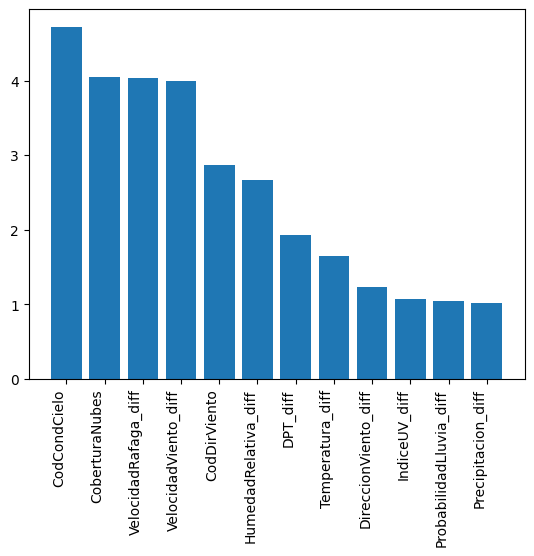

In [157]:
plt.figure()
plt.bar(vif_data['feature'], vif_data['VIF'])
plt.xticks(rotation = 90, ha = 'right')
plt.show()

Todas las variables tienen un VIF menor a 10, por lo que demuestra que las variables independientes no están relacionadas entre sí.

### ANOVA de valor F

Vamos a revisar la linealidad de las variables.

In [170]:
f_value = f_regression(x_scaled, y)
pass_test = []
not_pass_test = []
alpha = 0.05
for i in range(len(f_value[1])):
    print(x.columns[i], f_value[1][i])
    if f_value[1][i] < alpha:
        pass_test.append(x.columns[i])
    else:
        not_pass_test.append(x.columns[i])

Temperatura_diff 6.911976433500933e-146
ProbabilidadLluvia_diff 2.987746120266819e-290
HumedadRelativa_diff 7.804688651049983e-100
VelocidadViento_diff 6.153803609493455e-13
DireccionViento_diff 0.009685064375861092
CoberturaNubes 1.7833522077770508e-44
IndiceUV_diff 1.3690221095426027e-136
CodCondCielo 2.0026482946696356e-66
CodDirViento 7.203696163181971e-09
VelocidadRafaga_diff 1.2294632853993339e-17
Precipitacion_diff 0.011154639483639199
DPT_diff 2.5864096245512476e-36


In [171]:
df_results = pd.DataFrame(f_value[0], index = x.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

,f_value
ProbabilidadLluvia_diff,1373.251656
Temperatura_diff,673.258588
IndiceUV_diff,629.039483
HumedadRelativa_diff,455.245192
CodCondCielo,298.744149
CoberturaNubes,196.753249
DPT_diff,159.025494
VelocidadRafaga_diff,73.248136
VelocidadViento_diff,51.869587
CodDirViento,33.509542


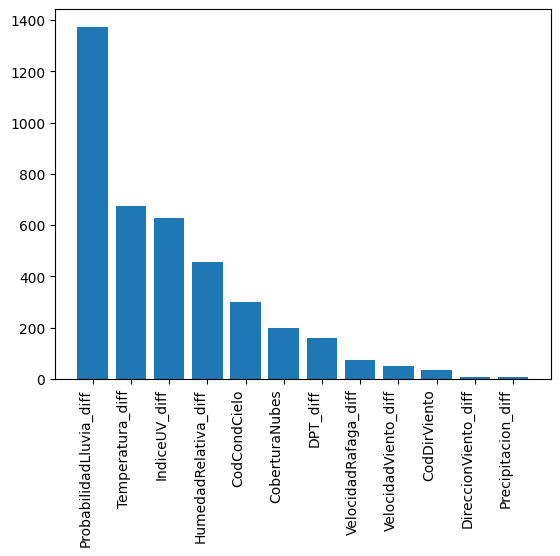

In [172]:
plt.figure()
plt.bar(df_results.drop(not_pass_test).index, df_results.drop(not_pass_test).f_value)
plt.xticks(rotation = 90, ha = 'right')
plt.show()

De acuerdo al gráfico de arriba, la probabilidad de lluvia, la temperatura, el índice UV, la Humedad Relativa son las variables que más afectan linealmente a la **Generación**. No se pueden descartar las últimas variables, ya que éstas podrían no ser lineales. Hay que hacer más análisis.

### Select K Best

Esta selección de característica, sirve para seleccionar de una las k características que quieras usar para el modelo. Éste recibe la técnica que quieres usar de selección y cuántas variables necesitas. Para utilizar, necesitas importar la librería *SelectKBest* de *sklearn.feature_selection*.

In [185]:
x_selected = SelectKBest(f_regression, k = 5).fit(x, y)
x_kBest = x_selected.transform(x)
x_kBest.shape

(18922, 5)

In [188]:
#Ahora mostramos cuáles se quedaron
x_BestColumns = x.iloc[:,x_selected.get_support()]
x_BestColumns

,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,IndiceUV_diff,CodCondCielo
24,-1.0,4.0,1.0,0.0,4
25,0.0,8.0,0.0,0.0,4
26,0.0,5.0,2.0,0.0,2
27,-1.0,0.0,1.0,0.0,2
28,0.0,0.0,7.0,0.0,2
...,...,...,...,...,...
18941,0.6,0.0,-11.0,0.0,3
18942,2.5,0.0,-20.0,0.0,3
18943,2.4,0.0,-20.0,0.0,3
18944,0.2,0.0,-28.0,0.0,3


Si lo comparamos con la gráfica del ANOVA, las columnas seleccionadas coinciden con el estadístico, donde las barras más altas, son las mejores características de acuerdo a la regresión con F.

### Valor R de correlación

In [173]:
r_value = r_regression(x_scaled, y)
r_value

array([ 0.18536922, -0.26013527, -0.1532848 , -0.05228792,  0.01880539,
       -0.10145043,  0.17938092, -0.12467725,  0.04204743, -0.06210101,
       -0.01844881, -0.09129674])

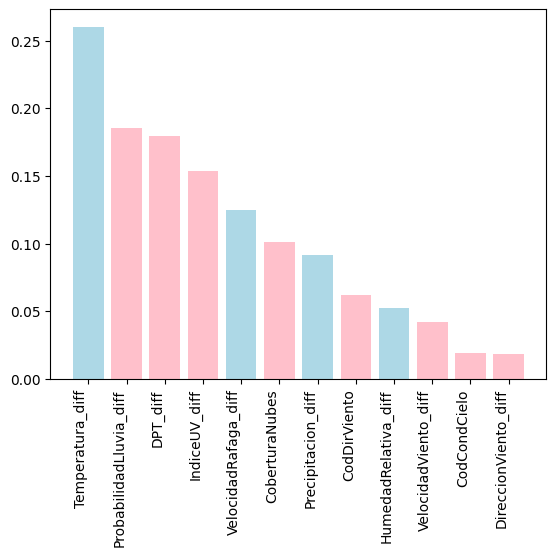

In [174]:
df_results['r_value'] = r_value
colors = []
for v in df_results['r_value']:
    if v > 0:
        colors.append('lightblue')
    else:
        colors.append('pink')

df_results['r_value_abs'] = df_results['r_value'].abs()
df_results.sort_values('r_value_abs', inplace = True, ascending = False)
plt.figure()
plt.bar(df_results.index, df_results.r_value_abs, color = colors)
plt.xticks(rotation = 90, ha = 'right')
plt.show()

De acuerdo con la gráfica de arriba, podemos notar que la probabilidad de lluvia y la temperatura, que también salió en el análisis de ANOVA con F, también predomina como característica principal. También debo mencionar que variables como la precipitación o el DPT, que en el ANOVA salieron bajas, aquí representan una alta correlación.

### Umbral de Varianza

In [175]:
selector = VarianceThreshold()
selector.fit_transform(x_scaled)
selector.variances_

array([0.00432143, 0.00712548, 0.00915443, 0.00492632, 0.0065203 ,
       0.12245537, 0.00285105, 0.106453  , 0.03888879, 0.00594655,
       0.0001746 , 0.00358679])

In [176]:
df_results['variance'] = selector.variances_
df_results.sort_values('variance', ascending = False, inplace = True)
df_results

,f_value,r_value,r_value_abs,variance
CoberturaNubes,196.753249,-0.101450,0.101450,0.122455
CodDirViento,33.509542,-0.062101,0.062101,0.106453
HumedadRelativa_diff,455.245192,-0.052288,0.052288,0.038889
DPT_diff,159.025494,0.179381,0.179381,0.009154
ProbabilidadLluvia_diff,1373.251656,0.185369,0.185369,0.007125
VelocidadRafaga_diff,73.248136,-0.124677,0.124677,0.006520
VelocidadViento_diff,51.869587,0.042047,0.042047,0.005947
IndiceUV_diff,629.039483,-0.153285,0.153285,0.004926
Temperatura_diff,673.258588,-0.260135,0.260135,0.004321
DireccionViento_diff,6.693284,-0.018449,0.018449,0.003587


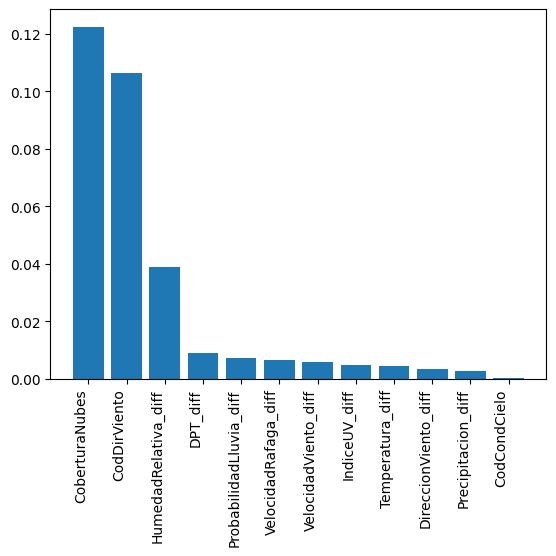

In [177]:
plt.figure()
plt.bar(df_results.index, df_results.variance)
plt.xticks(rotation = 90, ha = 'right')
plt.show()

Si consideráramos solo esta técnica de selección de características, quedarían las variables de Cobertura de Nubes, Dirección del Viento (la que es categórica) y la Humedad Relativa.

### Información Mutua

In [191]:
mi = mutual_info_regression(x, y, random_state = 0)
mi

array([0.03208345, 0.07249517, 0.02004632, 0.00858047, 0.0081736 ,
       0.03978344, 0.13327291, 0.05613031, 0.04004071, 0.01438778,
       0.00299857, 0.0126762 ])

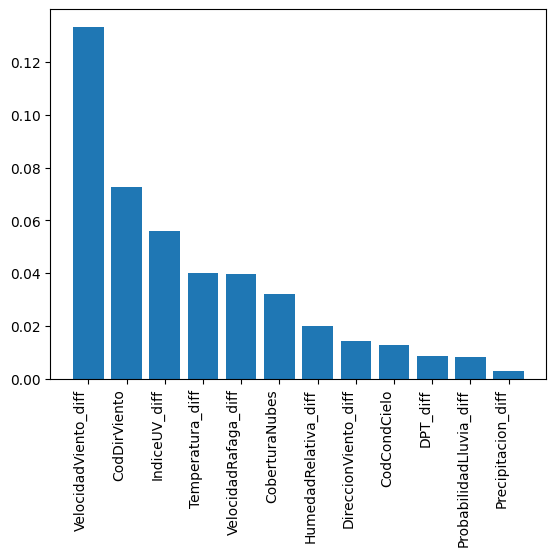

In [192]:
df_results['mi'] = mi
df_results.sort_values('mi', ascending = False, inplace = True)

plt.figure()
plt.bar(df_results.index, df_results.mi)
plt.xticks(rotation = 90, ha = 'right')
plt.show()

De acuerdo con ésta técnica, la Velocidad del Viento, la Dirección del Viento (la categórica) y el Índice UV, son los que presentan una mayor dependencia lineal con la **Generación**.

Ahora haremos un resumen de los datos analizados.

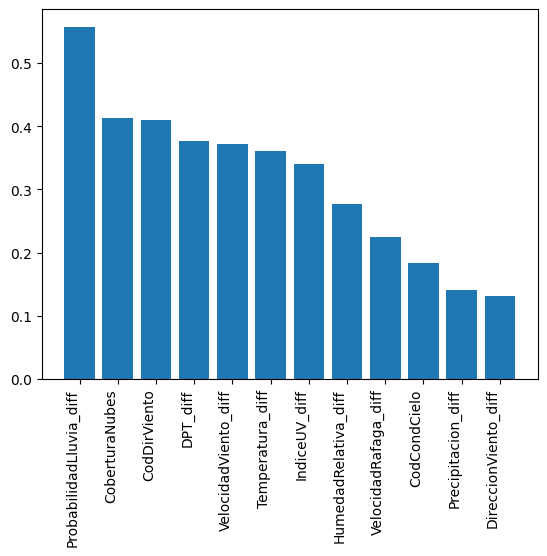

In [193]:
scaled = scaler.fit_transform(df_results)
df_results_scaled = pd.DataFrame(scaled, columns = df_results.columns)
df_results_scaled.set_index(df_results.index, inplace = True)
df_results_scaled['norm_mean'] = df_results_scaled.mean(axis = 1)
df_results_scaled.sort_values('norm_mean', ascending = False, inplace = True)

plt.figure()
plt.bar(df_results_scaled.index, df_results_scaled.mean(axis = 1))
plt.xticks(rotation = 90, ha = 'right')
plt.show()

De acuerdo con el gráfico unificado, la probabilidad de lluvia, la cobertura de nubes, la dirección del viento (variable categórica), son las 3 principales características que influyen en el resultado de la **Generación**.

## Wrapper

A continuación, se aplicarán diferentes técnicas de envoltura que nos ayudarán a seleccionar las mejores características que pueden ayudar a identificar las variables que nos ayudarán a predecir mejor la energía.

### EFS (Exhaustive Feature Selector)

In [234]:
x

,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,CoberturaNubes,IndiceUV_diff,CodCondCielo,CodDirViento,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
24,-1.0,4.0,1.0,-2.0,0.0,70,0.0,4,4,-2.0,0.0,0.0
25,0.0,8.0,0.0,0.0,0.0,70,0.0,4,4,-2.0,0.0,0.0
26,0.0,5.0,2.0,-2.0,0.0,70,0.0,2,4,-2.0,0.0,0.0
27,-1.0,0.0,1.0,0.0,0.0,70,0.0,2,4,-2.0,0.0,-1.0
28,0.0,0.0,7.0,0.0,0.0,70,0.0,2,4,-2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18941,0.6,0.0,-11.0,-2.5,16.0,73,0.0,3,3,-5.4,0.0,-3.4
18942,2.5,0.0,-20.0,-1.4,43.0,67,0.0,3,3,-3.6,-1.4,-2.7
18943,2.4,0.0,-20.0,0.3,33.0,61,0.0,3,4,-2.8,-1.3,-2.6
18944,0.2,0.0,-28.0,5.8,-9.0,56,0.0,3,4,5.0,0.0,-6.3


In [228]:
lr = LinearRegression()

efs = EFS(estimator = lr, min_features = 1, max_features  = 12, scoring = 'r2', cv = 12)

efs = efs.fit(x, y)

Features: 4095/4095

In [229]:
print('Best subset (corresponding names):', efs.best_feature_names_)

Best subset (corresponding names): ('Temperatura_diff', 'ProbabilidadLluvia_diff', 'DireccionViento_diff', 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'DPT_diff')


In [230]:
metric_dict = efs.get_metric_dict()
df_efs = pd.DataFrame(metric_dict).T
df_efs.sort_values('avg_score', ascending = False, inplace = True)
df_efs_best_10 = df_efs.iloc[:10]
df_efs_best_10

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
3499,"(0, 1, 4, 6, 7, 8, 9, 11)","[0.2810622899779136, 0.2347155481444826, 0.292...",0.098761,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",0.075015,0.114189,0.034429
3490,"(0, 1, 4, 5, 6, 8, 9, 11)","[0.27739822783279655, 0.22853314917668854, 0.2...",0.098592,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",0.073885,0.112468,0.03391
2729,"(0, 1, 4, 6, 7, 9, 11)","[0.2801192540097671, 0.2345384908882907, 0.291...",0.098465,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",0.074871,0.11397,0.034363
3896,"(0, 1, 3, 4, 6, 7, 8, 9, 11)","[0.2810579898255988, 0.23473324248101046, 0.29...",0.098334,"(Temperatura_diff, ProbabilidadLluvia_diff, Ve...",0.075007,0.114177,0.034426
3868,"(0, 1, 2, 4, 6, 7, 8, 9, 11)","[0.2808913525597144, 0.23415036481016482, 0.29...",0.098275,"(Temperatura_diff, ProbabilidadLluvia_diff, Hu...",0.074888,0.113995,0.034371
3887,"(0, 1, 3, 4, 5, 6, 8, 9, 11)","[0.2773935845129549, 0.2285577093997576, 0.291...",0.098161,"(Temperatura_diff, ProbabilidadLluvia_diff, Ve...",0.073883,0.112467,0.03391
2713,"(0, 1, 4, 5, 6, 9, 11)","[0.27609309727667264, 0.22786587061304853, 0.2...",0.098158,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",0.073662,0.112129,0.033808
3859,"(0, 1, 2, 4, 5, 6, 8, 9, 11)","[0.2771985700638263, 0.2279530463010545, 0.289...",0.098103,"(Temperatura_diff, ProbabilidadLluvia_diff, Hu...",0.073719,0.112216,0.033835
3909,"(0, 1, 4, 5, 6, 7, 8, 9, 11)","[0.27940538904212553, 0.2336706460604483, 0.29...",0.098087,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",0.07473,0.113755,0.034298
1784,"(0, 1, 6, 7, 9, 11)","[0.27987455290256136, 0.23584828678538117, 0.2...",0.098083,"(Temperatura_diff, ProbabilidadLluvia_diff, In...",0.074723,0.113745,0.034295


In [225]:
#Usaremos el EFS con los demás scores
efs = EFS(estimator = lr, min_features = 1, max_features  = 12, scoring = 'neg_mean_squared_error', cv = 12)

efs = efs.fit(x, y)

Features: 4095/4095

In [226]:
print('Best subset (corresponding names):', efs.best_feature_names_)

Best subset (corresponding names): ('Temperatura_diff', 'ProbabilidadLluvia_diff', 'DireccionViento_diff', 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'DPT_diff')


In [227]:
metric_dict = efs.get_metric_dict()
df_efs = pd.DataFrame(metric_dict).T
df_efs.sort_values('avg_score', ascending = False, inplace = True)
df_efs_best_10 = df_efs.iloc[:10]
df_efs_best_10

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
3499,"(0, 1, 4, 6, 7, 8, 9, 11)","[-25658005.500235718, -22548636.958598226, -18...",-24442831.067518,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",2325121.572757,3539338.369871,1067150.670815
2729,"(0, 1, 4, 6, 7, 9, 11)","[-25691661.297838654, -22553853.84204735, -188...",-24452222.668398,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",2327151.654696,3542428.594049,1068082.408463
3896,"(0, 1, 3, 4, 6, 7, 8, 9, 11)","[-25658158.96740013, -22548115.605825905, -188...",-24455470.592852,"(Temperatura_diff, ProbabilidadLluvia_diff, Ve...",2330822.710166,3548016.735175,1069767.296407
3868,"(0, 1, 2, 4, 6, 7, 8, 9, 11)","[-25664106.04713319, -22565289.738867946, -188...",-24456187.895882,"(Temperatura_diff, ProbabilidadLluvia_diff, Hu...",2323213.979972,3536434.600702,1066275.151469
3449,"(0, 1, 3, 4, 6, 7, 8, 11)","[-25637877.451003544, -22518609.407618415, -18...",-24460454.999315,"(Temperatura_diff, ProbabilidadLluvia_diff, Ve...",2323304.197351,3536571.931082,1066316.558137
3909,"(0, 1, 4, 5, 6, 7, 8, 9, 11)","[-25717138.26338218, -22579424.357575227, -188...",-24461913.005698,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",2321961.995724,3534528.80965,1065700.533847
3914,"(0, 1, 4, 6, 7, 8, 9, 10, 11)","[-25653387.381999943, -22546412.71677459, -188...",-24462727.640235,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",2343592.694212,3567455.415305,1075628.27899
2725,"(0, 1, 4, 6, 7, 8, 9)","[-25653319.602265373, -22451604.554716654, -18...",-24462871.974308,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",2324269.577627,3538041.448845,1066759.634413
3391,"(0, 1, 2, 4, 6, 7, 8, 9)","[-25677947.646089084, -22546995.111852057, -18...",-24463969.389477,"(Temperatura_diff, ProbabilidadLluvia_diff, Hu...",2319996.150944,3531536.368335,1064798.278842
3451,"(0, 1, 3, 4, 6, 7, 9, 11)","[-25691801.133895457, -22553295.505494993, -18...",-24465044.650244,"(Temperatura_diff, ProbabilidadLluvia_diff, Ve...",2332875.439479,3551141.433558,1070709.428418


In [231]:
#Usaremos el EFS con los demás scores
efs = EFS(estimator = lr, min_features = 1, max_features  = 12, scoring = 'neg_root_mean_squared_error', cv = 12)

efs = efs.fit(x, y)

Features: 4095/4095

In [232]:
print('Best subset (corresponding names):', efs.best_feature_names_)

Best subset (corresponding names): ('Temperatura_diff', 'ProbabilidadLluvia_diff', 'DireccionViento_diff', 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'DPT_diff')


In [233]:
metric_dict = efs.get_metric_dict()
df_efs = pd.DataFrame(metric_dict).T
df_efs.sort_values('avg_score', ascending = False, inplace = True)
df_efs_best_10 = df_efs.iloc[:10]
df_efs_best_10

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
3499,"(0, 1, 4, 6, 7, 8, 9, 11)","[-5065.373184695844, -4748.540508261272, -4340...",-4930.790337,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",236.987361,360.746066,108.769031
2729,"(0, 1, 4, 6, 7, 9, 11)","[-5068.6942399239915, -4749.089790901763, -434...",-4931.72406,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",237.153691,360.999257,108.845371
3896,"(0, 1, 3, 4, 6, 7, 8, 9, 11)","[-5065.388333326491, -4748.485611837305, -4340...",-4932.016176,"(Temperatura_diff, ProbabilidadLluvia_diff, Ve...",237.48699,361.506609,108.998344
3868,"(0, 1, 2, 4, 6, 7, 8, 9, 11)","[-5065.975330292597, -4750.293647646211, -4346...",-4932.17715,"(Temperatura_diff, ProbabilidadLluvia_diff, Hu...",236.694662,360.300515,108.634693
3490,"(0, 1, 4, 5, 6, 8, 9, 11)","[-5078.2646038085895, -4767.682618629601, -434...",-4932.597613,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",242.762437,369.536981,111.419592
3449,"(0, 1, 3, 4, 6, 7, 8, 11)","[-5063.385967018863, -4745.37768861641, -4344....",-4932.611461,"(Temperatura_diff, ProbabilidadLluvia_diff, Ve...",236.678904,360.276527,108.62746
3914,"(0, 1, 4, 6, 7, 8, 9, 10, 11)","[-5064.917312454365, -4748.306299805709, -4339...",-4932.616409,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",238.697782,363.349697,109.554056
3909,"(0, 1, 4, 5, 6, 7, 8, 9, 11)","[-5071.206785705172, -4751.78117736657, -4345....",-4932.772534,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",236.5594,360.094617,108.572612
2725,"(0, 1, 4, 6, 7, 8, 9)","[-5064.910621350131, -4738.312416326793, -4351...",-4932.861894,"(Temperatura_diff, ProbabilidadLluvia_diff, Di...",236.629969,360.202038,108.605001
3451,"(0, 1, 3, 4, 6, 7, 9, 11)","[-5068.708033995987, -4749.031007005007, -4344...",-4932.96799,"(Temperatura_diff, ProbabilidadLluvia_diff, Ve...",237.654504,361.761602,109.075227


In [239]:
model = LinearRegression().fit(x[['Temperatura_diff', 'ProbabilidadLluvia_diff', 'DireccionViento_diff', 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'DPT_diff']], y)
r_sq = model.score(x[['Temperatura_diff', 'ProbabilidadLluvia_diff', 'DireccionViento_diff', 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'DPT_diff']], y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

coefficient of determination: 0.12305512234382732
intercept: 105.94091403301097
coefficients: [ 310.76054395  -86.79454438   -3.79268595  741.04547427 -189.2997047
   73.91681825  -30.77392195  -50.18584042]


Podemos concluir que con todos los scores, dieron las mismas variables como mejor modelo para representar la predicción de la *Generación*, por lo que serán esas columnas con las que trabajaremos.

## Bibliografía

1. [The Effectiveness of Feature Selection Method in Solar Power Prediction](https://www.hindawi.com/journals/jre/2013/952613/)
2. [Predicting solar power output using machine learning techniques](https://towardsdatascience.com/predicting-solar-power-output-using-machine-learning-techniques-56e7959acb1f)
3. [Comparison Analysis of Machine Learning Techniques for Photovoltaic Prediction Using Weather Sensor Data](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7308868/)